# Trabalho 2 - Aprendizado de Máquina

## 1 - Agrupamento

### 1.2 - Encontrando o centróide mais próximo

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

%matplotlib inline

def find_closest_centroids(X, centroids):
    # Tive que fazer uma correção nessa primeira linha pois o código
    # trazia K = 2 ao invés de K = 3
    K = centroids.shape[0]
    idx = np.zeros((len(X), 1), dtype=np.int8)

    for i in range(len(idx)):
        # Definindo um limite alto para min_dist para garantir
        # que ele vá ser maior que a primeira distância euclisiana
        # calculada entre um ponto e a localização do centroid
        min_dist = 1000000
        for j in range(K):
            # Calculando a distância euclisiana dos dados até os centroides
            dist = np.sqrt(np.sum((X[i, :] - centroids[j, :]) ** 2))
            if dist < min_dist:
                # Definindo a qual cluster cada observação pertence
                min_dist = dist
                idx[i] = j
    return idx

# Find closest centroids
raw_mat = scipy.io.loadmat("ex7data2.mat")
X = raw_mat.get("X")

K = 3

# Fixed seeds (i.e., initial centroids)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)

# Plot initial assignments.
plt.scatter(X[np.where(idx == 0), 0], X[np.where(idx == 0), 1], marker='x')
plt.scatter(X[np.where(idx == 1), 0], X[np.where(idx == 1), 1], marker='x')
plt.scatter(X[np.where(idx == 2), 0], X[np.where(idx == 2), 1], marker='x')
plt.title('Initial assignments')

print('Cluster assignments for the first, '
      'second and third examples: ' + str(idx[0:3].flatten()))

FileNotFoundError: [Errno 2] No such file or directory: 'ex7data2.mat'

### 1.3 - Atualização dos centróides

Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


Text(0.5,1,'Final clustering')

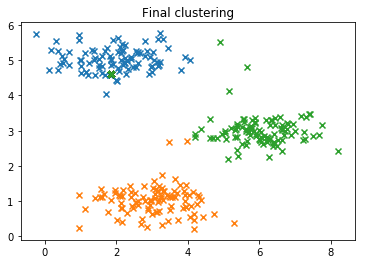

In [2]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K, np.size(X, 1)))
    # Para cada K, vamos definir um novo valor dos centróides dentro do loop
    for i in range(K):
        # aux recebe todos os valores de idx equivalentes aos agrupamento i
        aux = np.where(idx == i)[0]
        # Calcula a média dos valores daquele agrupamento para gerar
        # o novo centróide
        centroids[i, :] = np.mean(X[aux, :], axis=0)
    return centroids


def kmeans_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]


def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids

    for iter in range(max_iters):
        # Assignment of examples do centroids
        idx = find_closest_centroids(X, centroids)

        # PLot the evolution in centroids through the iterations
        if plot_progress:
            plt.scatter(X[np.where(idx == 0), 0],
                        X[np.where(idx == 0), 1], marker='x')
            plt.scatter(X[np.where(idx == 1), 0],
                        X[np.where(idx == 1), 1], marker='x')
            plt.scatter(X[np.where(idx == 2), 0],
                        X[np.where(idx == 2), 1], marker='x')
            plt.plot(previous_centroids[:, 0], previous_centroids[:, 1],
                     'yo')
            plt.plot(centroids[:, 0], centroids[:, 1], 'bo')
            plt.show()

        previous_centroids = centroids

        # Compute new centroids
        centroids = compute_centroids(X, idx, K)

    return (centroids, idx)

 # Compute initial means
centroids = compute_centroids(X, idx, K)

# Now run 10 iterations of K-means on fixed seeds
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
# initial_centroids = kmeans_init_centroids(X, K)
max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters,
                                plot_progress=False)
print('Centroids after the 1st update:\n' + str(centroids))

# Plot final clustering.
plt.scatter(X[np.where(idx == 0), 0], X[np.where(idx == 0), 1], marker='x')
plt.scatter(X[np.where(idx == 1), 0], X[np.where(idx == 1), 1], marker='x')
plt.scatter(X[np.where(idx == 2), 0], X[np.where(idx == 2), 1], marker='x')
plt.title('Final clustering')

### 1.5 - Inicialização aleatória

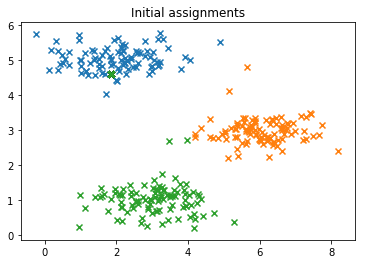

Cluster assignments for the first, second and third examples: [0 1 1]
Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


Text(0.5,1,'Final clustering')

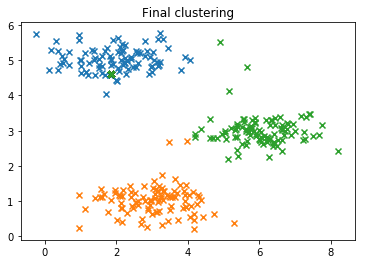

In [3]:
def kmeans_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]

initial_centroids = kmeans_init_centroids(X, K)
idx = find_closest_centroids(X, initial_centroids)

# Plot initial assignments.
plt.scatter(X[np.where(idx == 0), 0], X[np.where(idx == 0), 1], marker='x')
plt.scatter(X[np.where(idx == 1), 0], X[np.where(idx == 1), 1], marker='x')
plt.scatter(X[np.where(idx == 2), 0], X[np.where(idx == 2), 1], marker='x')
plt.title('Initial assignments')
plt.show()

print('Cluster assignments for the first, '
      'second and third examples: ' + str(idx[0:3].flatten()))

# Compute initial means
centroids = compute_centroids(X, idx, K)

# Now run 10 iterations of K-means on fixed seeds
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
# initial_centroids = kmeans_init_centroids(X, K)
max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters,
                            plot_progress=False)
print('Centroids after the 1st update:\n' + str(centroids))

# Plot final clustering.
plt.scatter(X[np.where(idx == 0), 0], X[np.where(idx == 0), 1], marker='x')
plt.scatter(X[np.where(idx == 1), 0], X[np.where(idx == 1), 1], marker='x')
plt.scatter(X[np.where(idx == 2), 0], X[np.where(idx == 2), 1], marker='x')
plt.title('Final clustering')

## 2 - Redução de Dimensionalidade

### 2.1 - Conjunto de dados de exemplo

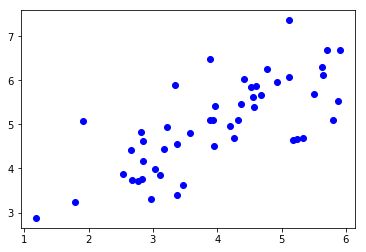

In [4]:
raw_mat = scipy.io.loadmat("ex7data1.mat")
X = raw_mat.get("X")
plt.cla()
plt.plot(X[:, 0], X[:, 1], 'bo')

### 2.2 - Implementando o PCA

'\nK = 2\nfor axis, color in zip(U[:K], ["yellow","green"]):\n    start, end = np.zeros(2), (mu + sigma * axis)[:K] - (mu)[:K]\n    plt.annotate(\'\', xy=end,xytext=start, arrowprops=dict(facecolor=color, width=1.0))\nplt.axis(\'equal\')\nplt.title(\'Redução de Dimensionalidade com PCA\')\n'

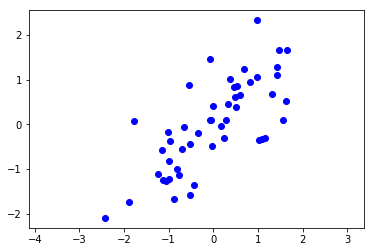

In [5]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    normalized_X = np.divide(X - mu, sigma)

    return (normalized_X, mu, sigma)


def pca(X):
    # Transforma X numa matriz pra permitir calculo do produto com seu transposto
    X = np.matrix(X)
    m = X.shape[0]
    # Calculando a matriz de covariancia dos dados
    sigma = np.dot(X.T, X) / m
    # Aplicando a decomposição de valores singulares para computar os componentes principais
    U, S, V = np.linalg.svd(sigma)
    return (U, S)

X_norm, mu, sigma = normalize_features(X)
U, S = pca(X_norm)

plt.cla()
plt.axis('equal')
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
"""
Não consegui fazer essa parte rodar, erro na linha do start, end relacionado
ao (mu + sigma * axis
K = 2
for axis, color in zip(U[:K], ["yellow","green"]):
    start, end = np.zeros(2), (mu + sigma * axis)[:K] - (mu)[:K]
    plt.annotate('', xy=end,xytext=start, arrowprops=dict(facecolor=color, width=1.0))
plt.axis('equal')
plt.title('Redução de Dimensionalidade com PCA')
"""

### 2.3 - Redução de Dimensionalidade com o PCA

#### 2.3.1 - Projetando os dados nos componentes principais

In [6]:
def project_data(X, U, K):
    U_reduce = U[:, 0:K]
    Z = np.zeros((len(X), K))
    for i in range(len(X)):
        x = X[i, :]
        projection_k = np.dot(x, U_reduce)
        Z[i] = projection_k
    return Z

K = 1
X_proj = project_data(X_norm, U, K)
X_proj[0]

array([1.49631261])

#### 2.3.2 - Reconstruindo uma aproximação dos dados

[-1.05805279 -1.05805279]


(-2.6226830356073587,
 1.8594098449299346,
 -2.4871555775296543,
 2.559198596885852)

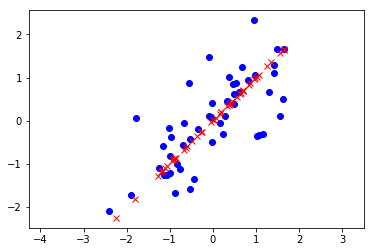

In [7]:
def recover_data(Z, U, K):
    X_rec = np.zeros((len(Z), len(U)))
    for i in range(len(Z)):
        v = Z[i, :]
        for j in range(np.size(U, 1)):
            recovered_j = np.dot(v.T, U[j, 0:K])
            X_rec[i][j] = recovered_j
    return X_rec

Z = project_data(X_norm, U, K)
X_rec = recover_data(Z, U, K)
print(X_rec[0])

plt.cla()
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'rx')
plt.axis('equal')

## 3 - Detecção de Anomalias

### 3.1 - Distribuição Gaussiana

(3.813393457265501, 24.279086893400002, 3.0998468726828614, 25.376792599651566)

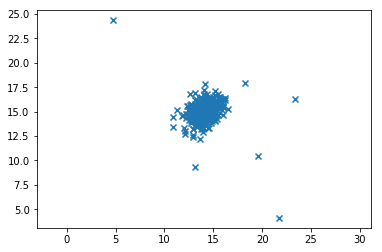

In [8]:
import matplotlib.mlab as mlab
from scipy.io import loadmat
from scipy import stats

data = loadmat('ex8data1.mat')
X = data['X']

# Plot dataset
plt.scatter(X[:,0], X[:,1], marker='x')  
plt.axis('equal')

### 3.2 -  Estimativa de parâmetros para uma gaussiana

mu: [14.11222578 14.99771051]
variance: [1.83263141 1.70974533]


c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  from ipykernel import kernelapp as app


(0.0, 24.975, 0.0, 24.975)

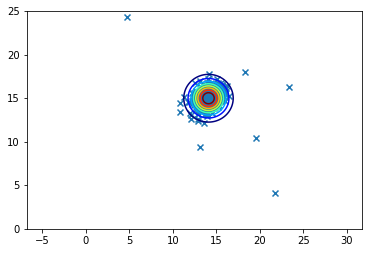

In [9]:
def estimate_gaussian_params(X):
    # Vetor mu recebe a média de cada feature de X
    mu = np.mean(X, axis=0)
    # Vetor sigma2 recebe a variância de cada feature de X
    sigma2 = np.var(X, axis=0)
    return (mu, sigma2)

(mu, sigma2) = estimate_gaussian_params(X)
print('mu: ' + str(mu))
print('variance: ' + str(sigma2))

# Plot dataset and contour lines
plt.scatter(X[:,0], X[:,1], marker='x')  
x = np.arange(0, 25, .025)
y = np.arange(0, 25, .025)
first_axis, second_axis = np.meshgrid(x, y)
Z = mlab.bivariate_normal(first_axis, second_axis, np.sqrt(sigma2[0]), np.sqrt(sigma2[1]), mu[0], mu[1])
plt.contour(first_axis, second_axis, Z, 10, cmap=plt.cm.jet)
plt.axis('equal')

### 3.3 - Selecionando epsilon

(307,)
step size: 8.990852779269493e-05
Best value found for epsilon: 8.990852779269493e-05


c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


(3.5855175063782054,
 24.506962844287298,
 2.7165825853753134,
 25.760056886959116)

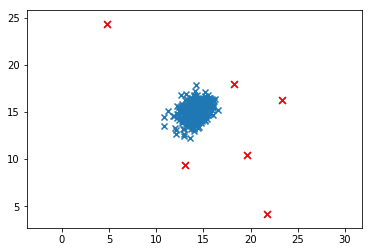

In [10]:
def select_epsilon(pval, yval):
    best_epsilon_value = 0
    best_f1_value = 0

    step_size = (pval.max() - pval.min()) / 1000

    print('step size: ' + str(step_size))

    for epsilon in np.arange(pval.min(), pval.max(), step_size):
        preds = pval < epsilon
        # Calculando verdadeiros positivos. Rótulo diz que é uma anômalia e foi corretamente previsto como uma 
        true_positive = np.sum(np.logical_and(preds == 1, yval == 1))
        # Calculando falsos positivos. Rótulo diz que não é uma anômalia, mas foi previsto como uma
        false_positive = np.sum(np.logical_and(preds == 1, yval == 0))
        # Calculando falsos negativos. Rótulo diz que é uma anômalia, mas não foi previsto como uma
        false_negative = np.sum(np.logical_and(preds == 0, yval == 1))

        # Calculando a precisão do nosso algoritmo dado um determinado valor de epsilon
        prec = true_positive / (true_positive + false_positive)
        rec = true_positive / (true_positive + false_negative)
        f1 = (2 * prec * rec) / (prec + rec)

        # Selecionando o melhor valor de epsilon, ou seja, o com maior precisão
        if f1 > best_f1_value:
            best_f1_value = f1
            best_epsilon_value = epsilon
    return best_epsilon_value, best_f1_value

# Load validation dataset
Xval = data['Xval']
yval = data['yval'].flatten()

stddev = np.sqrt(sigma2)

pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], stddev[0])
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], stddev[1])
print(np.prod(pval, axis=1).shape)
epsilon, _ = select_epsilon(np.prod(pval, axis=1), yval)
print('Best value found for epsilon: ' + str(epsilon))

# Computando a densidade de probabilidade
# de cada um dos valores do dataset em
# relação a distribuição gaussiana
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], stddev[0])
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], stddev[1])

# Apply model to detect abnormal examples in X
anomalies = np.where(np.prod(p, axis=1) < epsilon)

# Plot the dataset X again, this time highlighting the abnormal examples.
plt.clf()
plt.scatter(X[:, 0], X[:, 1], marker='x')
plt.scatter(X[anomalies[0], 0], X[anomalies[0], 1], s=50, color='r', marker='x')
plt.axis('equal')